# Is there a correlation between Life Expectancy and GDP?

## Introduction
This project will investigate the relationship between the GDP of a country and the average life expectancy.

GDP Source: World Bank national accounts data, and OECD National Accounts data files.\
Life expectancy Data Source: World Health Organization

## Project scope
* How has the GDP changed over time for each country?
* How has the life expectancy changed over time for each country?
* How does the GDP vary between each country?
* How does the life expectancy vary between each country?
* Is there a correlation between life expectancy and GDP?
* Does this relationship alter with country?

## Initial analysis of the raw data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('all_data.csv')
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [4]:
print(df['Country'].value_counts())

Country
Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: count, dtype: int64


In [5]:
print(df['Year'].value_counts())

Year
2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
Name: count, dtype: int64


### Observations on the data
* There is no missing data from the file
* Each column has the correct data type
* 6 counties are compared: Chile, China, Germany, Mexico, USA and Zimbabwe
* The data has been recorded from 2000 to 2015
* The column life expectancy at birth(years) is long for coding and does not conform to the conventional style. It will therefore be changed to LEAB

In [6]:
df.rename(columns={'Life expectancy at birth (years)': 'LEAB'}, inplace=True)
print(df.head())

  Country  Year  LEAB           GDP
0   Chile  2000  77.3  7.786093e+10
1   Chile  2001  77.3  7.097992e+10
2   Chile  2002  77.8  6.973681e+10
3   Chile  2003  77.9  7.564346e+10
4   Chile  2004  78.0  9.921039e+10


## Data analysis

### GDP

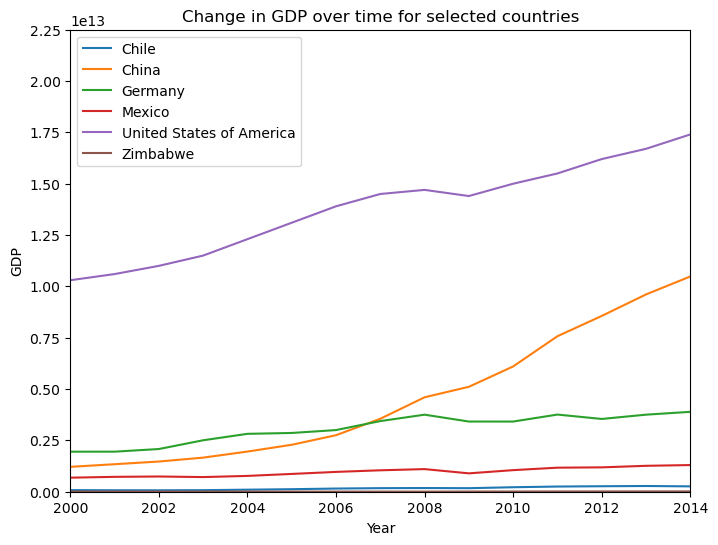

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(df[df.Country=='Chile'].Year, df[df.Country=='Chile'].GDP)
plt.plot(df[df.Country=='China'].Year, df[df.Country=='China'].GDP)
plt.plot(df[df.Country=='Germany'].Year, df[df.Country=='Germany'].GDP)
plt.plot(df[df.Country=='Mexico'].Year, df[df.Country=='Mexico'].GDP)
plt.plot(df[df.Country=='United States of America'].Year, df[df.Country=='United States of America'].GDP)
plt.plot(df[df.Country=='Zimbabwe'].Year, df[df.Country=='Zimbabwe'].GDP)
plt.xlabel('Year')
plt.ylabel('GDP')
plt.axis([2000, 2014, 0, 22500000000000])
plt.title('Change in GDP over time for selected countries')
plt.legend(['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe'])
plt.savefig('le_GDP_all.png')
plt.show()
plt.clf()


For each country the GDP was observed to increase over time, with the most noticeable changes observed for the United States of America and China. Interestingly, the growth was initially slow for China but a rate increase was observed from 2006 onwards. Mexico, Chile and Zimbabwe how the lowest GDP for the 6 countries and also experienced the slowest growth. 

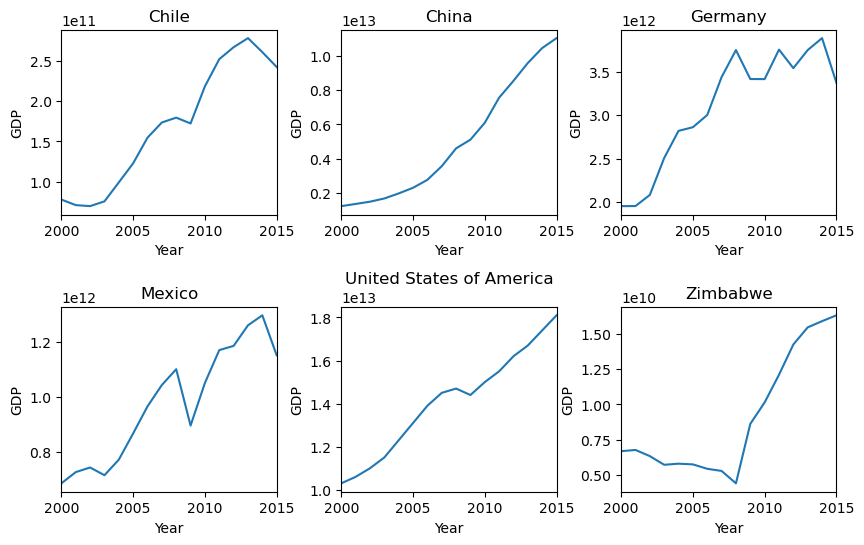

<Figure size 640x480 with 0 Axes>

In [20]:
countries = ['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']
i=1
plt.figure(figsize=(10, 6))
for country in countries:
    plt.subplot(2, 3, i)
    plt.plot(df[df.Country==country].Year, df[df.Country==country].GDP)
    plt.title(country)
    plt.xlabel('Year')
    plt.ylabel('GDP')
    plt.xlim([2000, 2015])
    i += 1
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.savefig('le_GDP_single.png')
plt.show()
plt.clf()

When the countries are plotted on their own the true pattern of their growth can be observed. Most of the counties experienced a steady increase in GDP overtime with the exception of Germany where a plateau was observed from 2008. Zimbabwe also experienced a plateau prior to a rapid increase in growth. Displaying the graphs separately also has the advantage of effectively normalising the data. This highlights that Zimbabwe has experienced the greatest rate of growth over the time frame studied. 

### Life expectancy

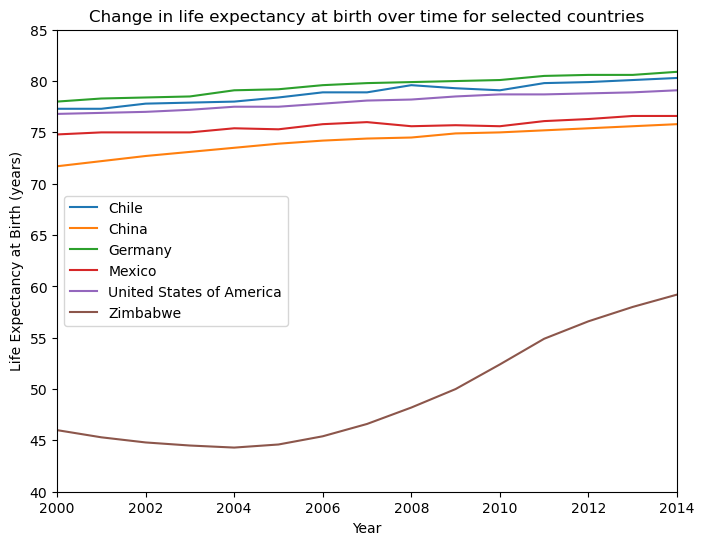

<Figure size 640x480 with 0 Axes>

In [27]:
plt.figure(figsize=(8, 6))
plt.plot(df[df.Country=='Chile'].Year, df[df.Country=='Chile'].LEAB)
plt.plot(df[df.Country=='China'].Year, df[df.Country=='China'].LEAB)
plt.plot(df[df.Country=='Germany'].Year, df[df.Country=='Germany'].LEAB)
plt.plot(df[df.Country=='Mexico'].Year, df[df.Country=='Mexico'].LEAB)
plt.plot(df[df.Country=='United States of America'].Year, df[df.Country=='United States of America'].LEAB)
plt.plot(df[df.Country=='Zimbabwe'].Year, df[df.Country=='Zimbabwe'].LEAB)
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth (years)')
plt.axis([2000, 2014, 40, 85])
plt.title('Change in life expectancy at birth over time for selected countries')
plt.legend(['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe'])
plt.savefig('le_le_all.png')
plt.show()
plt.clf()

Zimbabwe was found to have a much reduced life expectancy compared to the other countries studied and experienced a steady decrease until 2004. Each of the other countries experienced life expectancies between 70 and 80 years that steadily increased over the 15 years of the study.

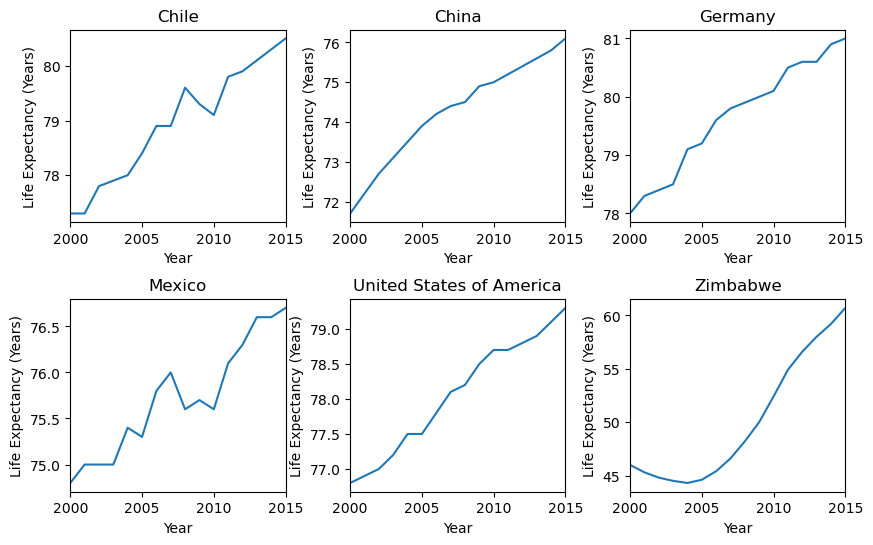

<Figure size 640x480 with 0 Axes>

In [23]:
countries = ['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']
i=1
plt.figure(figsize=(10, 6))
for country in countries:
    plt.subplot(2, 3, i)
    plt.plot(df[df.Country==country].Year, df[df.Country==country].LEAB)
    plt.title(country)
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy (Years)')
    plt.xlim([2000, 2015])
    i += 1
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.savefig('le_le_single.png')
plt.show()
plt.clf()

As seen in the combined plot the majority of countries experienced a steady increase in life expectancy over time. Mexico, however, saw a drop between 2007 and 2010 before it began to steadily increase again. 

### Correlation between life expectancy and GDP

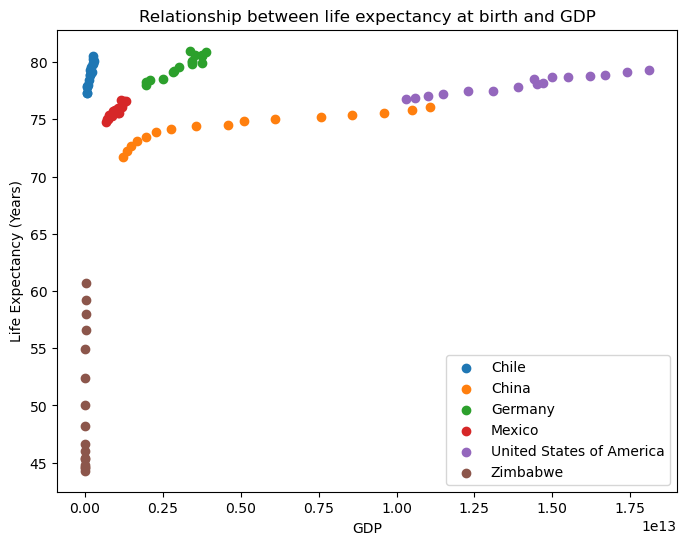

<Figure size 640x480 with 0 Axes>

In [28]:
plt.figure(figsize=(8, 6))
for country in countries:
    plt.scatter(df[df.Country==country].GDP, df[df.Country==country].LEAB)
plt.title('Relationship between life expectancy at birth and GDP')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy (Years)')
plt.legend(countries)
plt.savefig('le_legdp_all.png')
plt.show()
plt.clf()

The scatter plot of life expectancy versus GDP shows that there is no overall general pattern between the two variables and instead it is country dependant. Compared to the other countries, Zimbabwe has seen a large rise in life expectancy despite little change in GDP. China and the United States of America display a very similar relationship between life expectancy and GDP whereas Germany, Chile and Mexico have seen a greater rise in life expectancy for each dollar of wealth. 

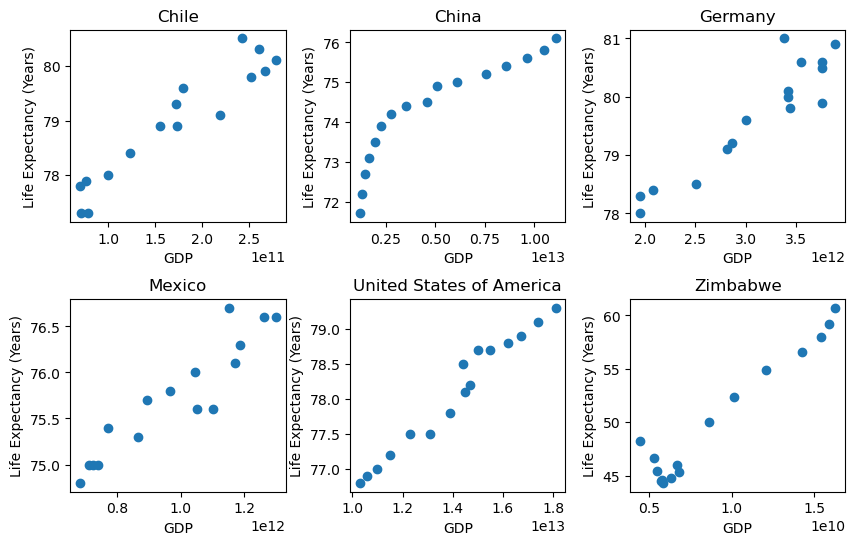

<Figure size 640x480 with 0 Axes>

In [25]:
countries = ['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']
i=1
plt.figure(figsize=(10, 6))
for country in countries:
    plt.subplot(2, 3, i)
    plt.scatter(df[df.Country==country].GDP, df[df.Country==country].LEAB)
    plt.title(country)
    plt.xlabel('GDP')
    plt.ylabel('Life Expectancy (Years)')
    i += 1
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.savefig('le_legdp_single.png')
plt.show()
plt.clf()

The individual plots provide more detail on the relationship between life expectancy and GDP. Germany, Chile, Mexico and the United States of America all have a positive linear correlation whereas China has a more exponential relationship. At low levels of GDP, Zimbabwe has a negative correlation with life expectancy but as the wealth is increased further a positive linear relationship is observed.

## Conclusions
The data analysis performed was able to answer each of the questions posed in the scope:

* How has the GDP changed over time for each country?\
The GDP was observed to increase over time for each country with the greatest growth experience by the United States of America and China. 

* How has the life expectancy changed over time for each country?\
The majority of countries experienced a steady increase in life expectancy over time. Mexico, however, saw a drop between 2007 and 2010 before it began to steadily increase again.

* How does the GDP vary between each country?\
The United States of America was found to have the highest GDP, followed by China. Chile and Zimbabwe were found to have a much lower GDP that the other countries.

* How does the life expectancy vary between each country?\
The majority of the countries experienced a life expectancy between 70 and 80 years, with Germany having the highest values. However, the life expectancy in Zimbabwe was notably lower at still below 60 years by the end of the study. 

* Is there a correlation between life expectancy and GDP?\
There is no overall correlation between life expectancy and GDP although China and the United States of America do display a similar relationship.

* Does this relationship alter with country?\
The correlation is highly dependent on the country with Zimbabwe displaying a rapid increase in life expectancy despite little change in GDP.  Germany, Chile, Mexico and the United States of America all have a positive linear correlation between life expectancy and GDP, whereas China has a more exponential relationship.

